# Time Series Plot

Chart yang sumbu X-nya adalah variabel waktu.

## Line Plot

TimeSeries Plot biasanya menggunakan Line Chart/Line Plot. Jadi sebelum menuju TimeSeries Plot ada baiknya kita mengetahui bagaimana cara membuat Line Chart.

In [45]:
import matplotlib.pyplot as plt
import numpy as np

### Contoh 1

In [46]:
import seaborn as sns

sns.set(style='darkgrid')

In [47]:
# Load dataset
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


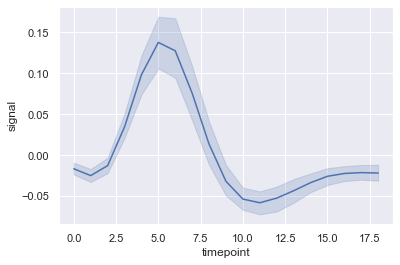

In [48]:
sns.lineplot(x='timepoint', y='signal', data=fmri)

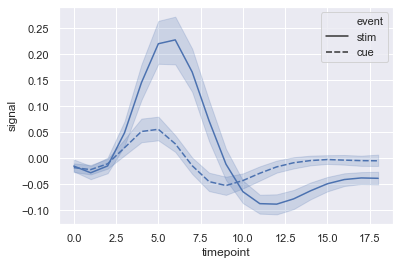

In [49]:
sns.lineplot(x='timepoint', y='signal', style='event', data=fmri)

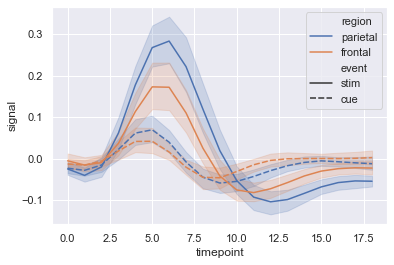

In [50]:
sns.lineplot(x='timepoint', y='signal', hue='region', style='event', data=fmri)

### Contoh 4

In [51]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
print(values)

[[  0.16792113   0.52350518   0.81737553   1.70384552]
 [ -1.97902642   1.23770369   0.05723019   2.74326736]
 [ -2.94547836   1.09402466   1.62835461   2.35998788]
 ...
 [-20.16215347   9.46658006 -10.38886875  17.95576784]
 [-20.32296367   9.63655141  -7.97732518  19.39724181]
 [-20.76771621  11.01141408  -7.94147579  19.35811172]]


In [52]:
import pandas as pd

dates = pd.date_range('1 1 2016', periods=365, freq='D')
data = pd.DataFrame(values, dates, columns=['A', 'B', 'C', 'D'])
data.head()

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846
2016-01-02,-1.979026,1.237704,0.057230,2.743267
2016-01-03,-2.945478,1.094025,1.628355,2.359988
2016-01-04,-2.307479,0.749367,1.624072,2.518347
2016-01-05,-3.270573,0.333310,1.867085,2.866550


In [53]:
data = data.rolling(7).mean()

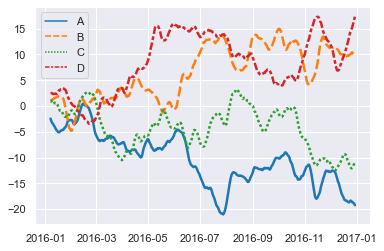

In [54]:
sns.lineplot(data=data, palette='tab10', linewidth=2.5)

### Contoh 5

In [55]:
sns.set(style='dark')
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


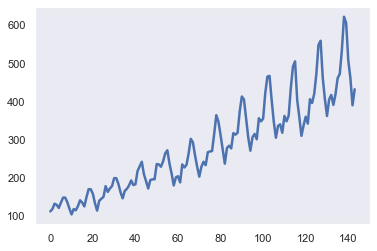

In [56]:
sns.lineplot(data=flights['passengers'], palette='tab10', linewidth=2.5)

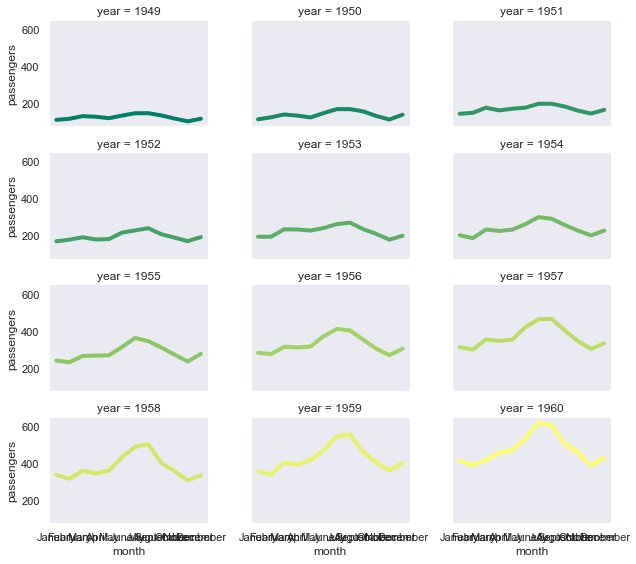

In [57]:
sns.relplot(data=flights,
            x='month', y='passengers', col='year', hue='year',
            kind='line', palette='summer', linewidth=4, zorder=5,
            col_wrap=3, height=2, aspect=1.5, legend=False,
            )

### Contoh 6

In [64]:
import pandas as pd

In [65]:
url = 'https://raw.githubusercontent.com/cornflake15/data-course/main/datasets/openweatherdata-denpasar-1990-2020.csv'
usecols = ['dt_iso', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 
           'clouds_all', 'weather_main', 'weather_description']
df = pd.read_csv(url, parse_dates=True, index_col='dt_iso', usecols=usecols)

# Jadikan kolom date sebagai index
df['date'] = df.index

df = df[['date', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 
           'clouds_all', 'weather_main', 'weather_description']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264924 entries, 1990-01-01 00:00:00 +0000 UTC to 2020-01-07 23:00:00 +0000 UTC
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 264924 non-null  object 
 1   temp                 264924 non-null  float64
 2   temp_min             264924 non-null  float64
 3   temp_max             264924 non-null  float64
 4   pressure             264924 non-null  float64
 5   humidity             264924 non-null  int64  
 6   wind_speed           264924 non-null  float64
 7   wind_deg             264924 non-null  int64  
 8   clouds_all           264924 non-null  int64  
 9   weather_main         264924 non-null  object 
 10  weather_description  264924 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 24.3+ MB


In [66]:
df.head()

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main,weather_description
dt_iso,,,,,,,,,,,
1990-01-01 00:00:00 +0000 UTC,1990-01-01 00:00:00 +0000 UTC,25.82,25.82,25.82,1010.0,86,1.36,225,98,Rain,light rain
1990-01-01 01:00:00 +0000 UTC,1990-01-01 01:00:00 +0000 UTC,26.20,26.20,26.20,1011.0,84,2.09,247,91,Rain,light rain
1990-01-01 02:00:00 +0000 UTC,1990-01-01 02:00:00 +0000 UTC,26.45,26.45,26.45,1011.0,84,2.44,262,94,Rain,light rain
1990-01-01 03:00:00 +0000 UTC,1990-01-01 03:00:00 +0000 UTC,26.80,26.80,26.80,1011.0,82,2.29,271,94,Rain,light rain
1990-01-01 04:00:00 +0000 UTC,1990-01-01 04:00:00 +0000 UTC,27.04,27.04,27.04,1010.0,82,1.71,274,76,Clouds,broken clouds


In [67]:
# Function to resampling time series data
def data_resample(data, time):
    """
    data: Dataframe
    time: Resampling frequencies
    """
    if time == 'hourly':
        data = data.resample('H').mean() # hour
    elif time == 'daily':
        data = data.resample('D').mean() # day
    elif time == 'weekly':
        data = data.resample('W').mean() # week
    elif time == 'monthly':
        data = data.resample('M').mean() # month
    elif time == 'quarterly':
        data = data.resample('Q').mean() # quarter
    elif time == 'yearly':
        data = data.resample('A').mean() # year
    
    return data

def line_plot(data, plot_kind, xlabel, title):
    plt.figure(1, figsize=(12, 5))
    data.plot(kind=plot_kind)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()